In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import networkx as nx

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None
Mapping of original labels to encoded values for Sex:
F -> 0
M -> 1

Mapping of original labels to encoded values for BP:
HIGH -> 0
LOW -> 1
NORMAL -> 2

Mapping of original labels to encoded values for Cholesterol:
HIGH -> 0
NORMAL -> 1

Mapping of original labels to encoded values for Drug:
drugA -> 0
drugB -> 1
drugC -> 2
drugX -> 3
drugY -> 4

Model Accuracy: 1.00


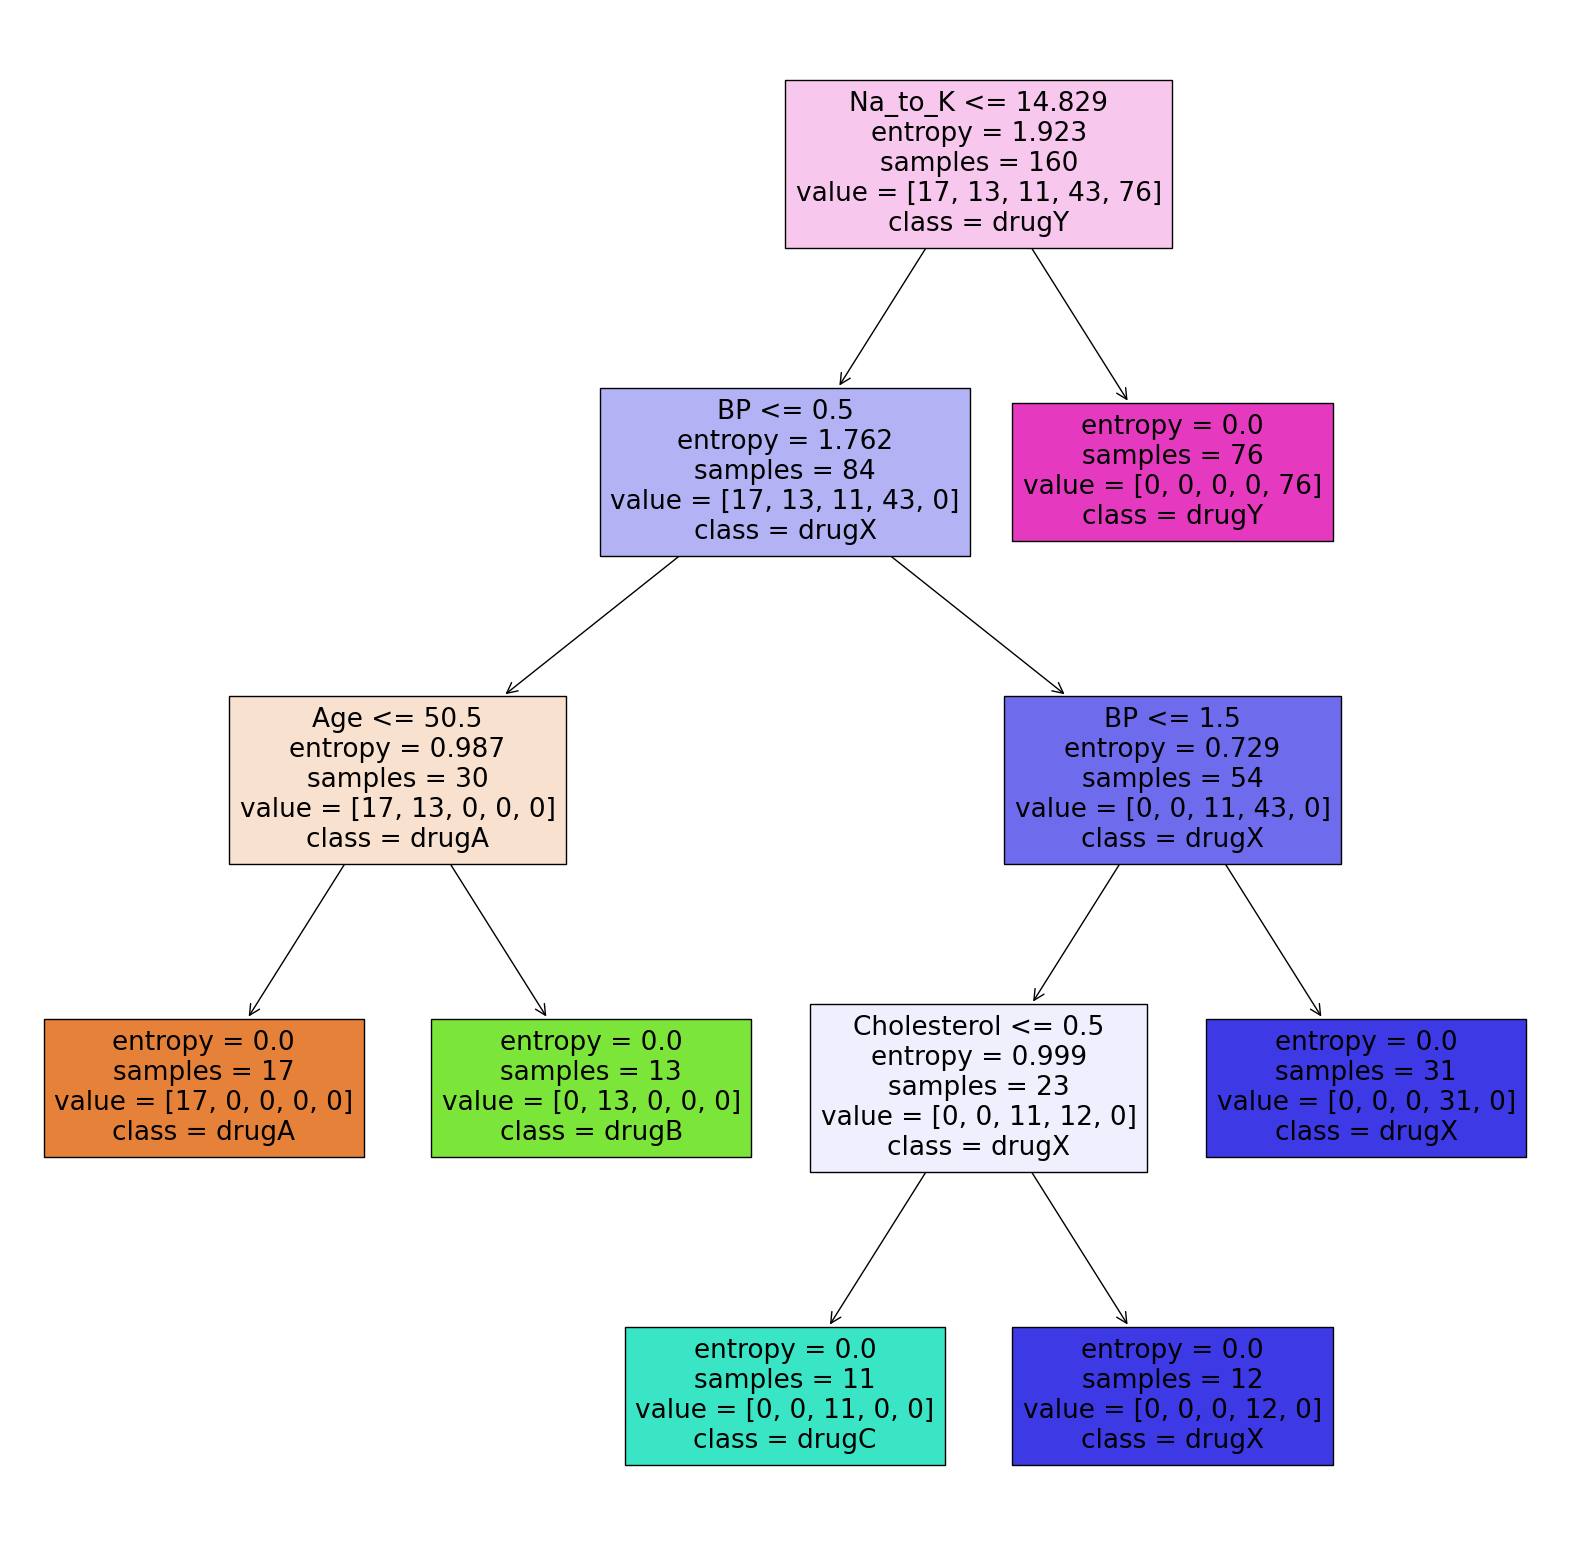

In [286]:
dataset = pd.read_csv('drug200.csv')
print(dataset.info())

label_encoders = {}
for column in ['Sex', 'BP', 'Cholesterol', 'Drug']:
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])
    label_encoders[column] = le

for column, le in label_encoders.items():
    print(f"Mapping of original labels to encoded values for {column}:")
    for original_label, encoded_value in zip(le.classes_, range(len(le.classes_))):
        print(f"{original_label} -> {encoded_value}")
    print()

X = data.drop('Drug', axis=1)
y = data['Drug']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


plt.figure(figsize=(20,20))
tree.plot_tree(clf, feature_names=X.columns, class_names=label_encoders['Drug'].classes_, filled=True)
plt.show()

In [275]:
# Sex: 0-1 = F-M 
# BP: 0-1-2 = HIGH-LOW-NORMAL
# Choles: 0-1 = HIGH-NORMAL
sample = pd.DataFrame([[30, 1, 2, 1, 15.5],
                       [24, 0, 0, 0, 12.31],
                       [42, 0, 1, 1, 9.3],
                       [60, 1, 0, 0, 7.655]
                      ], columns=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'])

predicted_drug = model.predict(sample)
print("Predicted medicine of the new patient:", predicted_drug)

Predicted medicine of the new patient: [4 0 3 1]


In [ ]:
dataset2 = pd.read_csv('https://raw.githubusercontent.com/datasethub/ds105/master/Model-Evaluation-and-Refinement.csv')
dataset2.head()

: 